# Урок 2.

## Домашнее задание <a class='anchor' id='hw'>

1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.
2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?
3. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [25]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

__Задача:__ предсказание баллов ЕГЭ ученика<br>
1.Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.

In [26]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [27]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [28]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [29]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [30]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [31]:
W = np.random.randn(X.shape[1])
W

array([ 0.14996482, -0.14651295,  0.49994537,  0.40158833])

In [121]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        #if i % (iterations / 10) == 0:
            #print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return list(W)

In [122]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-1, reg=1e-4)

Final MSE: 24.904627646688848


[56.49717514124293, 6.302345877845559, -0.35437787173643426, 6.569897298555164]

In [123]:
reg_arr = np.logspace(-10, 1, 50) #сгенирировали массив для лямбда
W_arr = np.zeros((50, X_st.shape[1])) #массив из нулей,потом будем заполнять значениями весов исходя из расчета функции 
                                      #gradient_descent_reg_l2 для каждого лямбда

In [124]:
reg_arr

array([1.00000000e-10, 1.67683294e-10, 2.81176870e-10, 4.71486636e-10,
       7.90604321e-10, 1.32571137e-09, 2.22299648e-09, 3.72759372e-09,
       6.25055193e-09, 1.04811313e-08, 1.75751062e-08, 2.94705170e-08,
       4.94171336e-08, 8.28642773e-08, 1.38949549e-07, 2.32995181e-07,
       3.90693994e-07, 6.55128557e-07, 1.09854114e-06, 1.84206997e-06,
       3.08884360e-06, 5.17947468e-06, 8.68511374e-06, 1.45634848e-05,
       2.44205309e-05, 4.09491506e-05, 6.86648845e-05, 1.15139540e-04,
       1.93069773e-04, 3.23745754e-04, 5.42867544e-04, 9.10298178e-04,
       1.52641797e-03, 2.55954792e-03, 4.29193426e-03, 7.19685673e-03,
       1.20679264e-02, 2.02358965e-02, 3.39322177e-02, 5.68986603e-02,
       9.54095476e-02, 1.59985872e-01, 2.68269580e-01, 4.49843267e-01,
       7.54312006e-01, 1.26485522e+00, 2.12095089e+00, 3.55648031e+00,
       5.96362332e+00, 1.00000000e+01])

In [125]:
for i in range(len(reg_arr)):
    W_arr[i, :] = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-1, reg=reg_arr[i]) 
    #заполяем массив весов исходя из изменений лямбда
    

Final MSE: 24.904618876908394
Final MSE: 24.9046188769084
Final MSE: 24.90461887690838
Final MSE: 24.904618876908376
Final MSE: 24.904618876908383
Final MSE: 24.9046188769084
Final MSE: 24.904618876908394
Final MSE: 24.904618876908394
Final MSE: 24.904618876908422
Final MSE: 24.90461887690846
Final MSE: 24.904618876908668
Final MSE: 24.904618876909147
Final MSE: 24.904618876910526
Final MSE: 24.904618876914398
Final MSE: 24.90461887692532
Final MSE: 24.904618876955993
Final MSE: 24.904618877042267
Final MSE: 24.90461887728486
Final MSE: 24.90461887796689
Final MSE: 24.90461887988467
Final MSE: 24.90461888527698
Final MSE: 24.904618900438884
Final MSE: 24.904618943070282
Final MSE: 24.904619062938433
Final MSE: 24.904619399973
Final MSE: 24.904620347603334
Final MSE: 24.90462301196539
Final MSE: 24.90463050280349
Final MSE: 24.904651561859687
Final MSE: 24.904710758812346
Final MSE: 24.904877130483275
Final MSE: 24.905344569493582
Final MSE: 24.906657211157572
Final MSE: 24.910340148268

In [126]:
W_arr


array([[ 5.65000000e+01,  6.30309349e+00, -3.56388847e-01,
         6.57147642e+00],
       [ 5.65000000e+01,  6.30309349e+00, -3.56388846e-01,
         6.57147642e+00],
       [ 5.65000000e+01,  6.30309349e+00, -3.56388844e-01,
         6.57147642e+00],
       [ 5.65000000e+01,  6.30309349e+00, -3.56388840e-01,
         6.57147642e+00],
       [ 5.65000000e+01,  6.30309349e+00, -3.56388833e-01,
         6.57147641e+00],
       [ 5.65000000e+01,  6.30309348e+00, -3.56388823e-01,
         6.57147640e+00],
       [ 5.64999999e+01,  6.30309348e+00, -3.56388805e-01,
         6.57147639e+00],
       [ 5.64999999e+01,  6.30309346e+00, -3.56388774e-01,
         6.57147637e+00],
       [ 5.64999998e+01,  6.30309345e+00, -3.56388723e-01,
         6.57147633e+00],
       [ 5.64999997e+01,  6.30309341e+00, -3.56388638e-01,
         6.57147626e+00],
       [ 5.64999995e+01,  6.30309336e+00, -3.56388496e-01,
         6.57147615e+00],
       [ 5.64999992e+01,  6.30309327e+00, -3.56388256e-01,
      

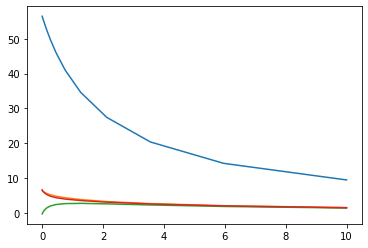

In [119]:
for i in range(4):
    plt.plot(reg_arr, W_arr[:, i])

При увеличении лямда мы видим, что веса признаков стремятся к значению чуть более 1, вне зависимости имели ли веса отрицательные значения или положительные. Или же можно сделать вывод, что с уменьшением значения лямбда веса всё сильнее отличаются друг от друга и тем самым улучшается результат нашей модели, так как среднеквадратичная ошибка уменьшается.

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

**Ответ:** применить к признаку одновременно нельзя, а если применить сначала нормализацию, а потом стандартизацию, то сам факт нормализации признака исчезнет (и наоборот). Всё это следует из определения данных признаков масштабирования:

**Нормализация данных** — метод предобработки числовых признаков в обучающих наборах данных с целью приведения их к некоторой общей шкале без потери информации о различии диапазонов. (шкала от 0 до 1)

**Стандартизация** — метод предобработки с целью приведения данных к единому формату и представлению. (М=0, std=1) Значения признаков могут быть положительными и отрицательными

3. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [129]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W/abs(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [130]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-1, reg=1e-4)

Iter: 0, weights: [11.373748    1.44997835  1.53528948  2.74459793], error 3373.580610660244
Iter: 500, weights: [56.49995     6.30286712 -0.35567709  6.57094628], error 24.904618967625407
Iter: 1000, weights: [56.49995     6.30289122 -0.35579345  6.57104233], error 24.90461894099698
Iter: 1500, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.90461894099616
Iter: 2000, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.90461894099619
Iter: 2500, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.90461894099619
Iter: 3000, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.90461894099619
Iter: 3500, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.90461894099619
Iter: 4000, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.90461894099619
Iter: 4500, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.90461894099619
Final MSE: 24.90461894099619


array([56.49995   ,  6.30289122, -0.35579346,  6.57104233])